In [ ]:
# Install Kaggle
!pip install kaggle

# Make a directory for Kaggle configuration
!mkdir -p ~/.kaggle

# Upload kaggle.json
from google.colab import files
files.upload()  # Choose the kaggle.json file from your local machine

# Move kaggle.json to the correct directory
!mv kaggle.json ~/.kaggle/

# Set permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

# List datasets on Kaggle (optional)
!kaggle datasets list -s diamonds

# Download the Diamonds dataset (replace 'shivam2503/diamonds' with your dataset path)
!kaggle datasets download -d shivam2503/diamonds

# Unzip the dataset
!unzip diamonds.zip

# Load the dataset into a Pandas DataFrame
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diamonds.csv')

# Preview the dataset
print(df.head())

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Dataset URL: https://www.kaggle.com/datasets/shivam2503/diamonds
License(s): unknown
diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  diamonds.zip
replace diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diamonds

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First few rows of the dataset:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       

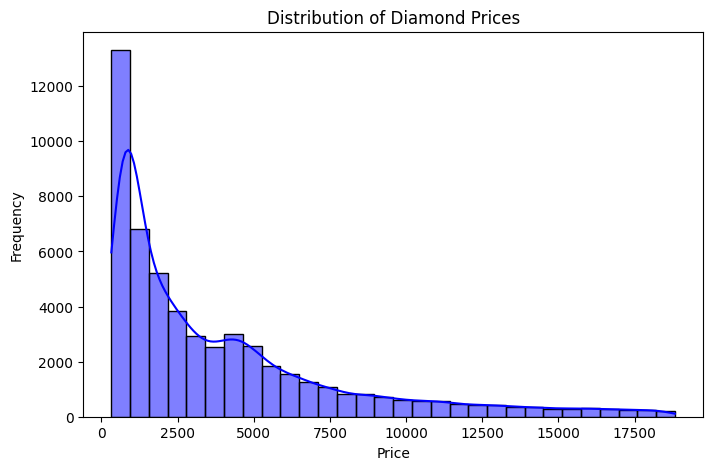

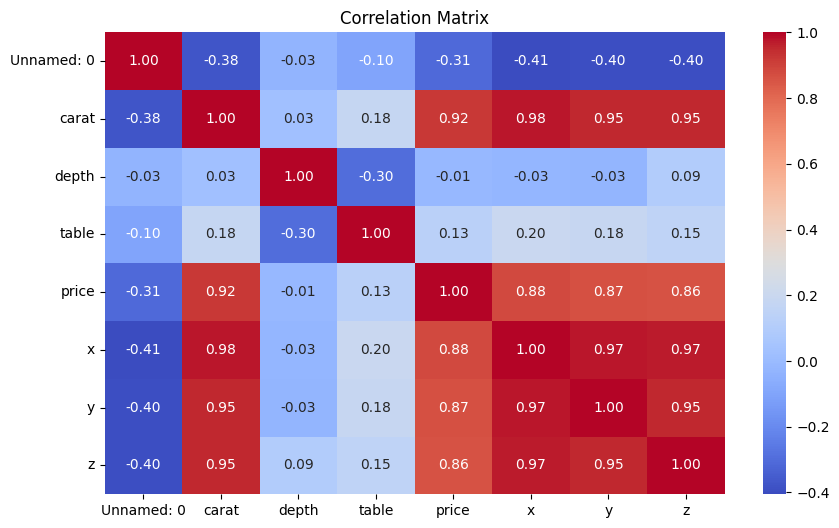

In [ ]:
#Visualize the distribution of the target variable (Price)
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check correlation between numerical features
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-9-02b39882a115>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, palette='Set2')


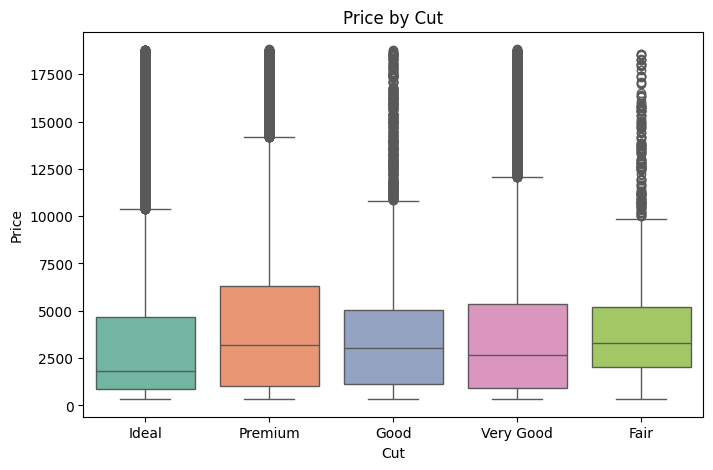

<ipython-input-9-02b39882a115>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='color', y='price', data=df, palette='Set3')


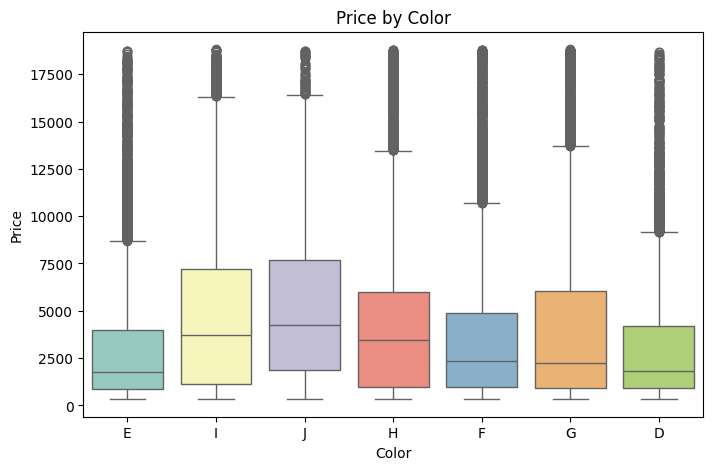

In [ ]:
# Boxplot of Price by Cut
plt.figure(figsize=(8, 5))
sns.boxplot(x='cut', y='price', data=df, palette='Set2')
plt.title('Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

# Boxplot of Price by Color
plt.figure(figsize=(8, 5))
sns.boxplot(x='color', y='price', data=df, palette='Set3')
plt.title('Price by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

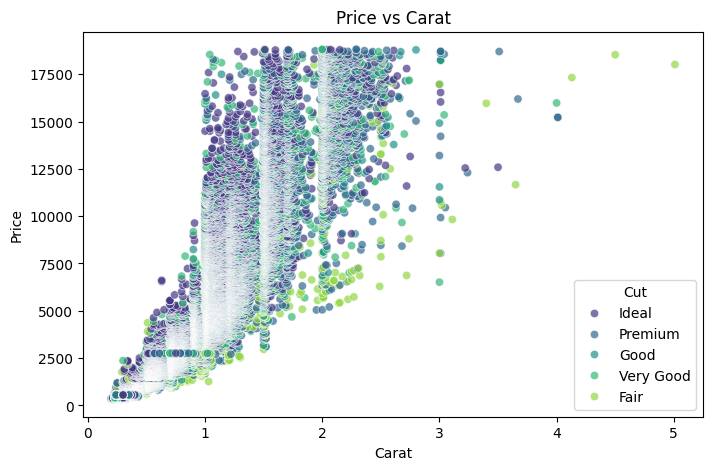

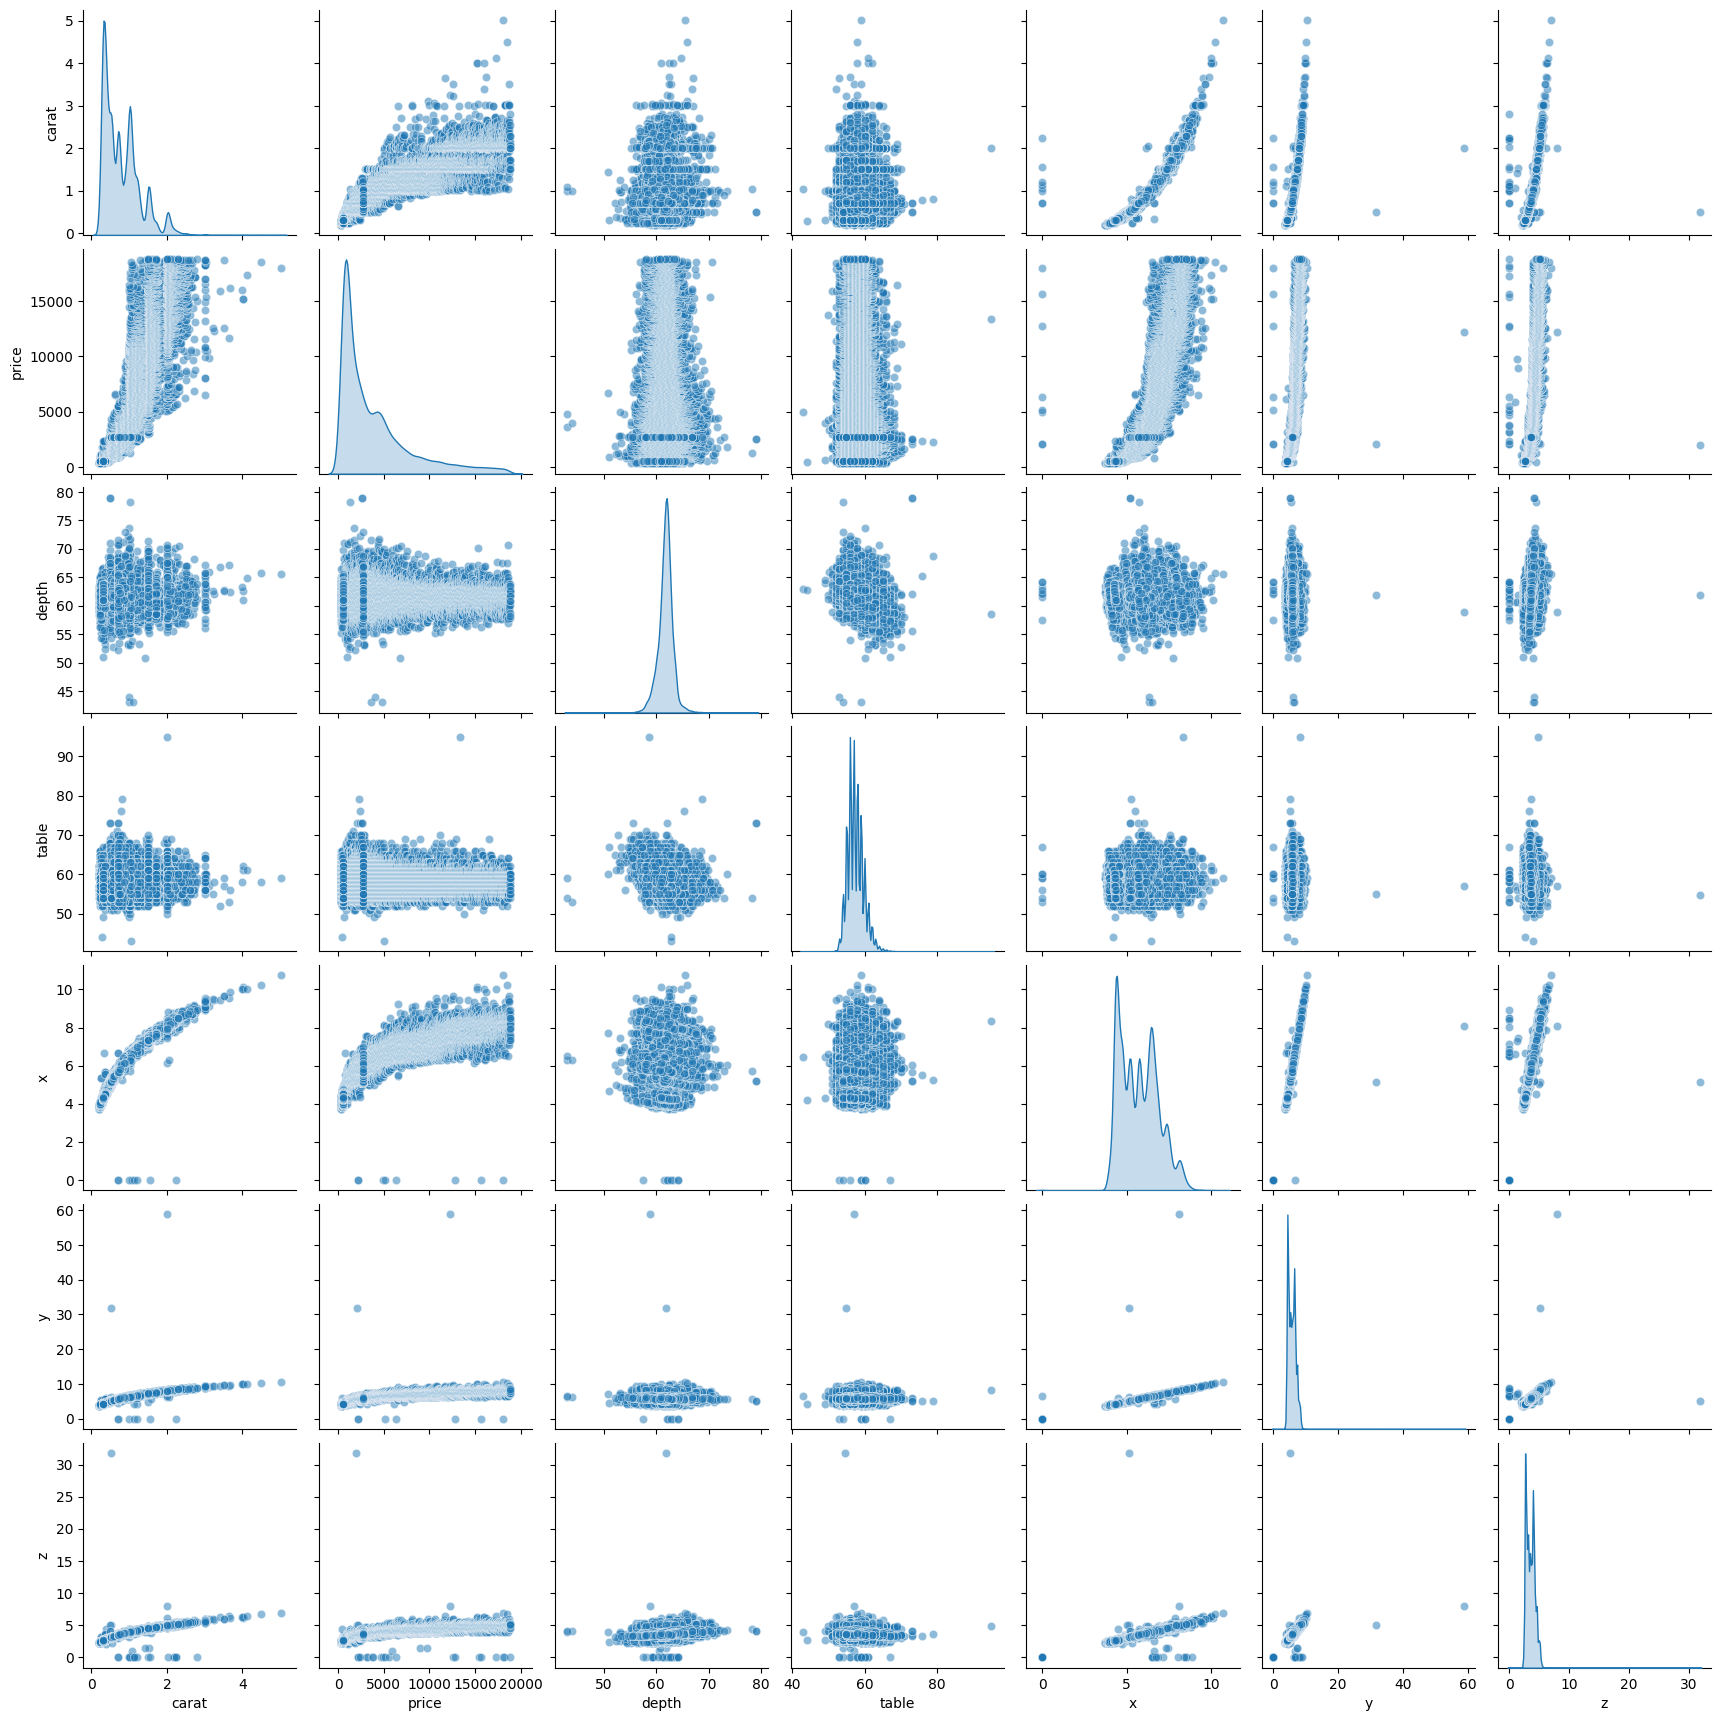

In [ ]:
# Scatterplot of Price vs Carat
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carat', y='price', data=df, hue='cut', palette='viridis', alpha=0.7)
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()

# Pairplot for selected features
selected_features = ['carat', 'price', 'depth', 'table', 'x', 'y', 'z']
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

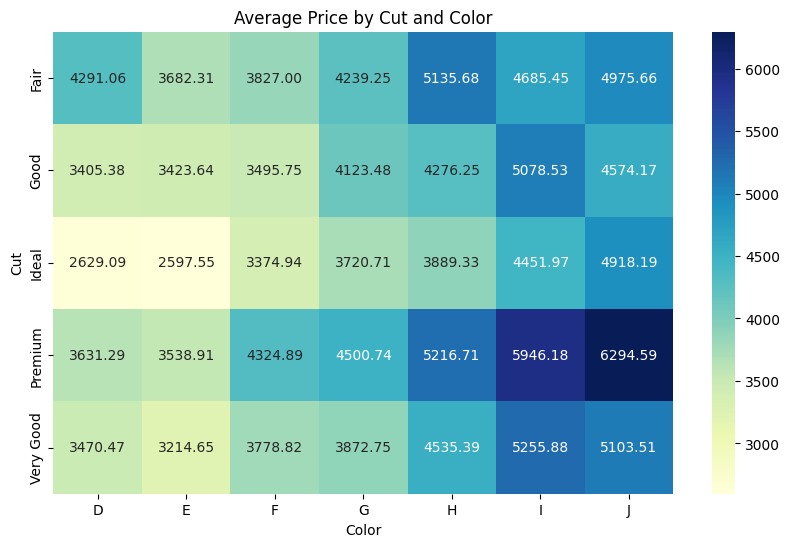

In [ ]:
# Grouping data for average price by cut and color
avg_price_cut_color = df.groupby(['cut', 'color'])['price'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(avg_price_cut_color, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Price by Cut and Color')
plt.xlabel('Color')
plt.ylabel('Cut')
plt.show()